In [1]:
from func_ler_grafo import ler_grafo
from algoritmos import Karger, Ingenuo
from tqdm import tqdm
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '..')

# Plotando gráfico da Taxa de acerto e o Número de Iterações do Karger

100%|██████████| 3/3 [00:09<00:00,  3.13s/it]


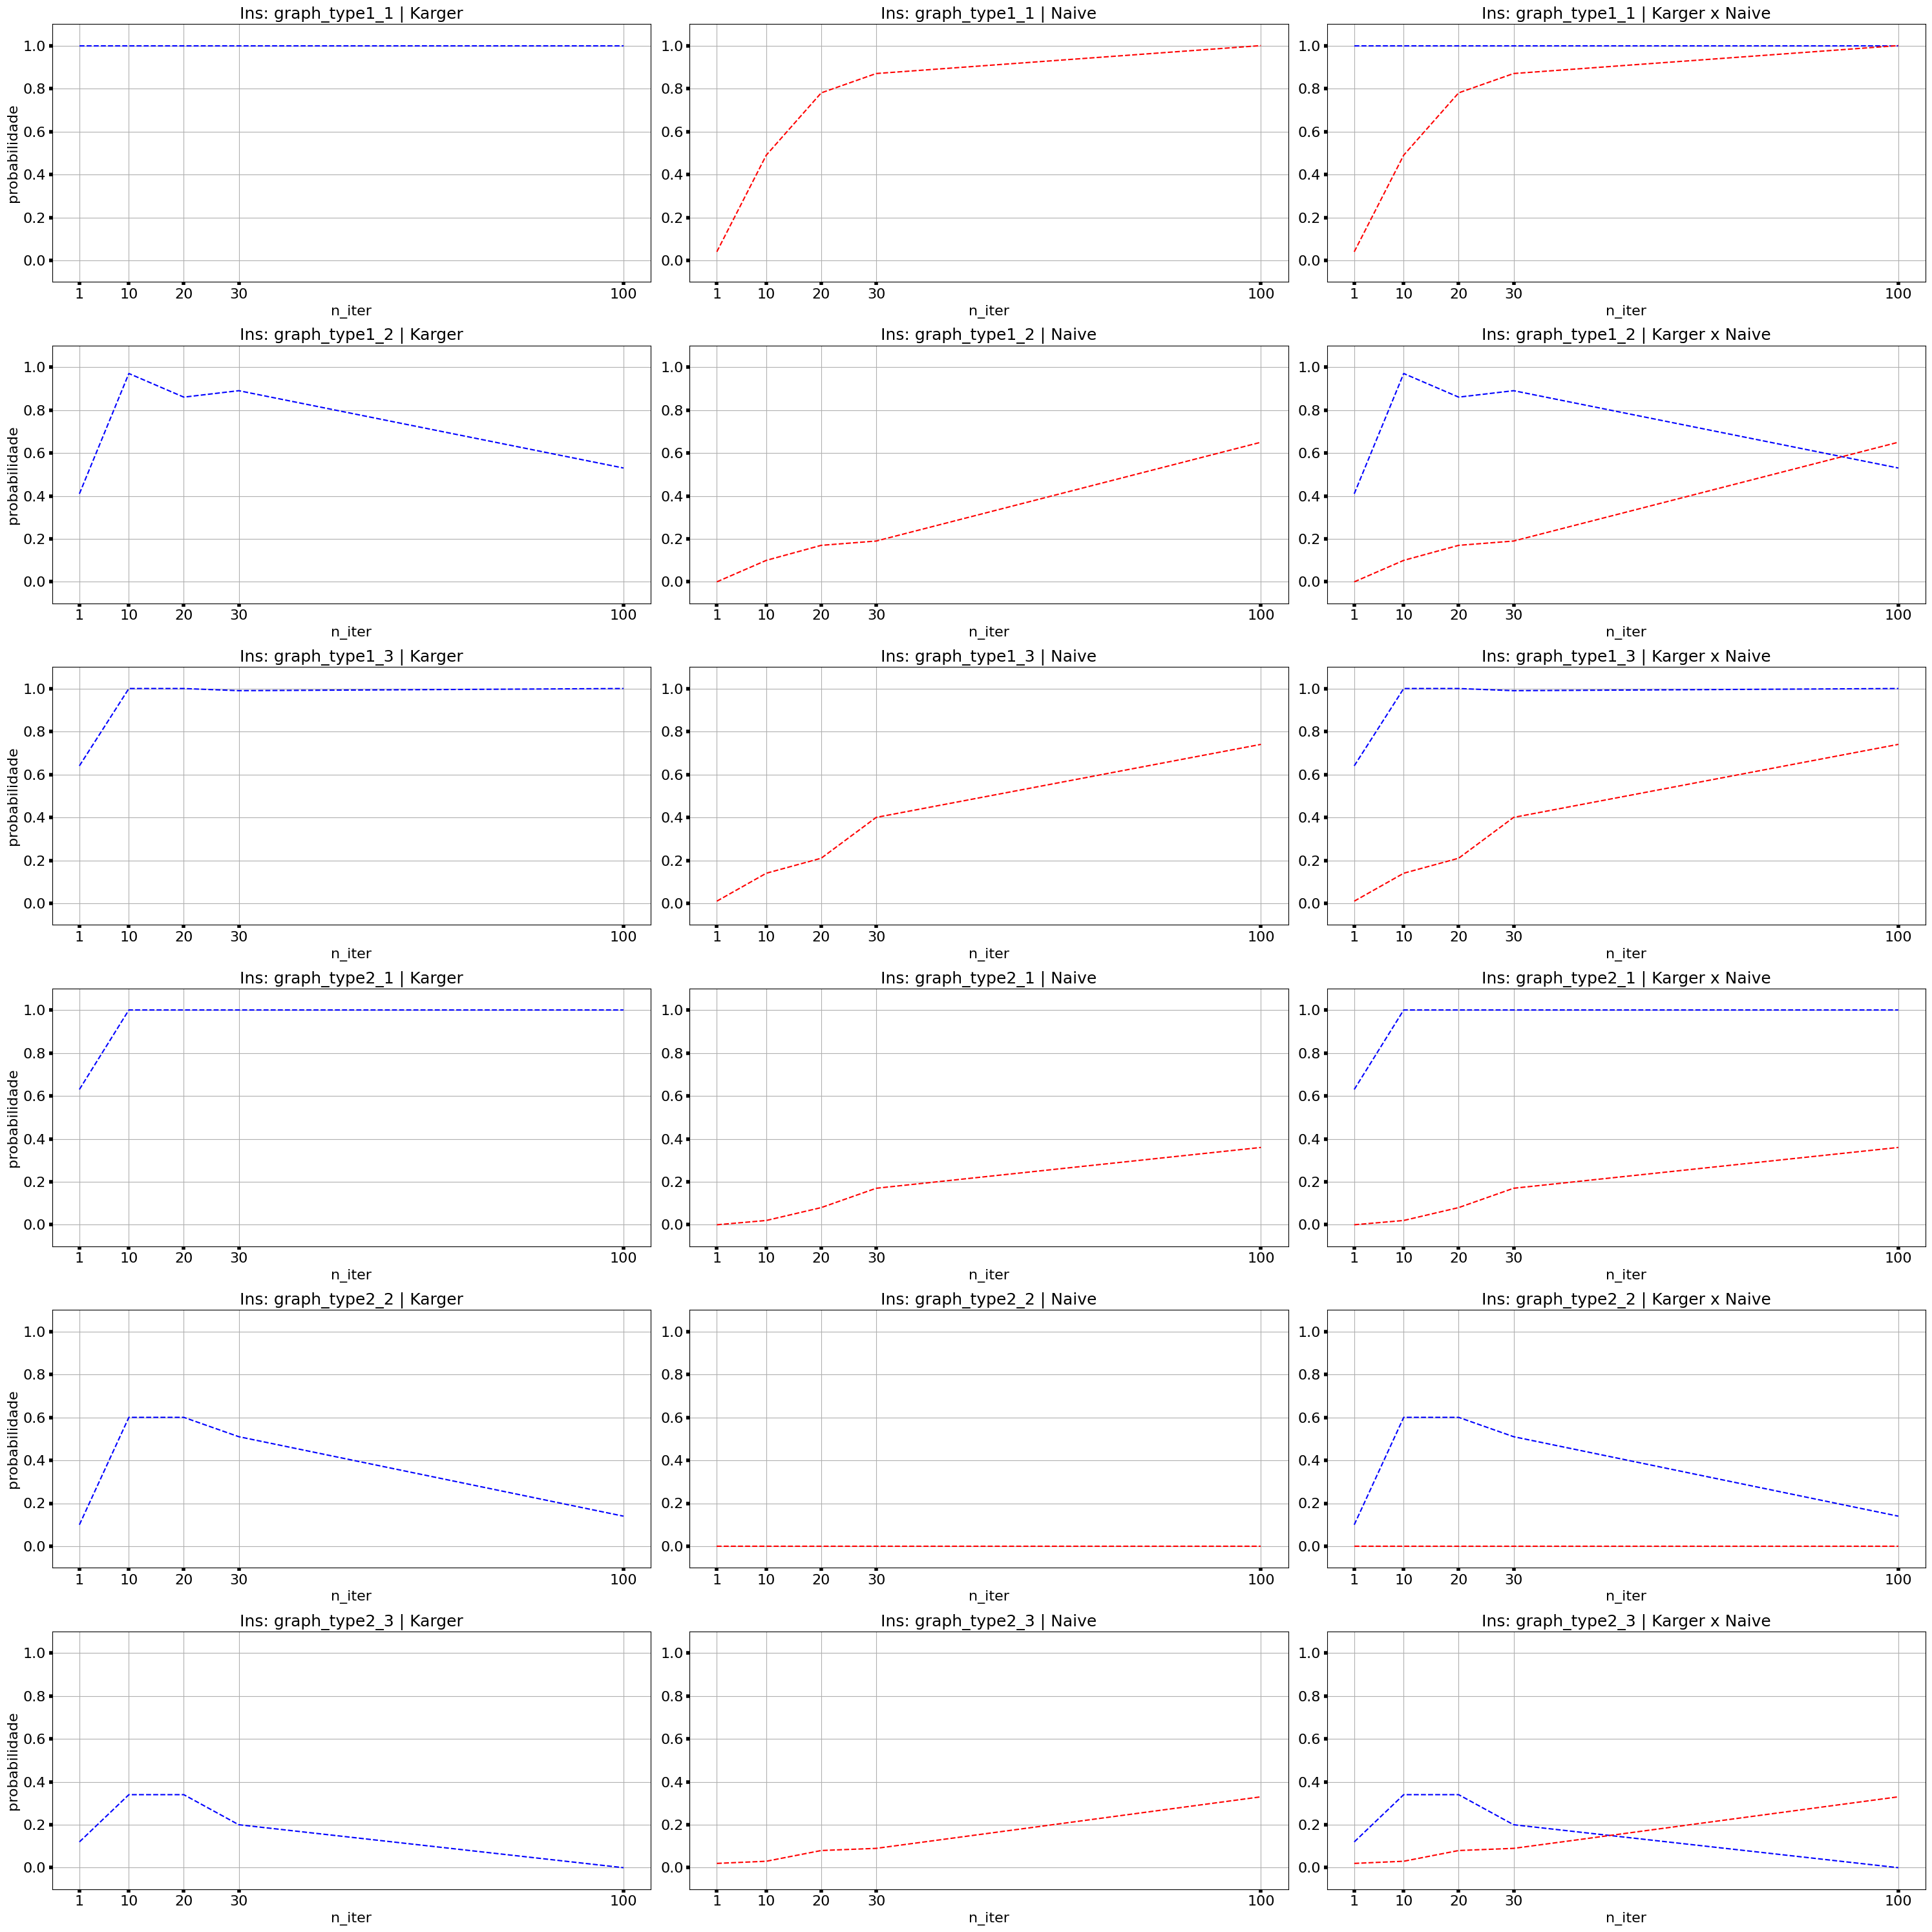

In [2]:
n_exec = 100
n_iter = [1, 10, 20, 30, 100]

names_file = ["graph_type1", "graph_type2"]

fig, axs = plt.subplots(6, 3, figsize=(30, 30))

l = 0

for name_file in names_file:
    for i in tqdm(range(1, 4)):
        lista_adj, lista_aresta = ler_grafo(f'../Trabalho3/instancias/in/{name_file}_{i}')

        arquivo_graph = open(f"./instancias/in/{name_file}_{i}", 'r').readlines()
        arquivo_out = open(f"./instancias/out/{name_file}_{i}", 'r').readlines()
        min_cut_real = int(arquivo_out[0])

        karger = Karger(lista_adj, lista_aresta)
        naive = Ingenuo(lista_adj, lista_aresta)
        
        probabilidades_karger = []
        probabilidades_naive = []

        for j in (range(len(n_iter))):

            it = n_iter[j]

            n_acertos_karger = 0
            n_acertos_naive = 0

            for _ in (range(n_exec)):

                min_cut_karger = karger.executar_n(it)
                min_cut_naive = naive.executar_n(it)

                if min_cut_karger == min_cut_real:
                    n_acertos_karger += 1

                if min_cut_naive == min_cut_real:
                    n_acertos_naive += 1


            probabilidades_karger.append(n_acertos_karger / n_exec)
            probabilidades_naive.append(n_acertos_naive / n_exec)
        

        axs[l][0].plot(n_iter, probabilidades_karger, 'b--')
        axs[l][0].set_title(f'Ins: {name_file}_{i} | Karger', fontsize=18)
        axs[l][0].set_ylabel('probabilidade', fontsize=16)
        axs[l][0].set_xlabel('n_iter', fontsize=16)
        axs[l][0].set_ylim([-0.1, 1.1])
        axs[l][0].tick_params(axis='both', which='major', labelsize=16, width=4)
        axs[l][0].set_xticks(n_iter)
        axs[l][0].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        axs[l][0].grid(True)

        axs[l][1].plot(n_iter, probabilidades_naive, 'r--')
        axs[l][1].set_title(f'Ins: {name_file}_{i} | Naive', fontsize=18)
        axs[l][1].set_xlabel('n_iter' , fontsize=16)
        axs[l][1].set_ylim([-0.1, 1.1])
        axs[l][1].tick_params(axis='both', which='major', labelsize=16, width=4)
        axs[l][1].set_xticks(n_iter)
        axs[l][1].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        axs[l][1].grid(True)

        axs[l][2].plot(n_iter, probabilidades_karger, 'b--')
        axs[l][2].plot(n_iter, probabilidades_naive, 'r--')
        axs[l][2].set_title(f'Ins: {name_file}_{i} | Karger x Naive', fontsize=18)
        axs[l][2].set_xlabel('n_iter' , fontsize=16)
        axs[l][2].set_ylim([-0.1, 1.1])
        axs[l][2].tick_params(axis='both', which='major', labelsize=16, width=4)
        axs[l][2].set_xticks(n_iter)
        axs[l][2].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        axs[l][2].grid(True)
    
        l += 1

fig.subplots_adjust(wspace=0.3, hspace=0.5)
fig.tight_layout()
plt.show()